# Assignment02 - KMeans

## 1.Performance Comparison

In [1]:
from sklearn.datasets import make_blobs
from cluster import cluster
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

%run -i cluster.py

In [2]:
X, cluster_assignments, centers = make_blobs(n_samples=700, centers=4, cluster_std=0.60, random_state=0, return_centers=True)
print(centers)

[[ 0.97627008  4.30378733]
 [ 2.05526752  0.89766366]
 [-1.52690401  2.91788226]
 [-1.24825577  7.83546002]]


**1. Use X as the parameter as input to your fit(...) function above, and use cluster_assignments to determine whether your implementation’s hypotheses are correct.**

In [3]:
c = cluster(k=4)
hypotheses, centroids = c.fit(X)

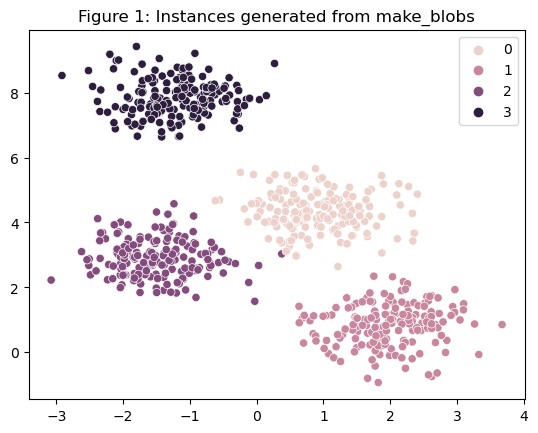

In [4]:
sns.scatterplot(data=X, x=X[:,0], y=X[:,1], hue=cluster_assignments)
plt.title('Figure 1: Instances generated from make_blobs')
plt.show()

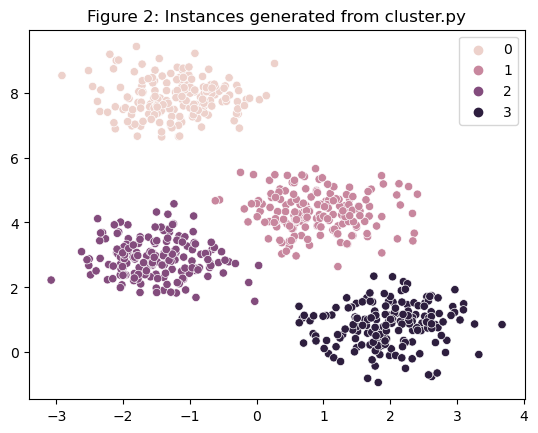

In [5]:
sns.scatterplot(data=X, x=X[:,0], y=X[:,1], hue=hypotheses)
plt.title('Figure 2: Instances generated from cluster.py')
plt.show()

> The clustering data between Figure 1 and Figure 2 are identical

**2. Use X as the parameter as input to KMeans as implemented in scikit-learn, and use cluster_assignments to determine whether that implementation’s hypotheses are correct.**

In [6]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

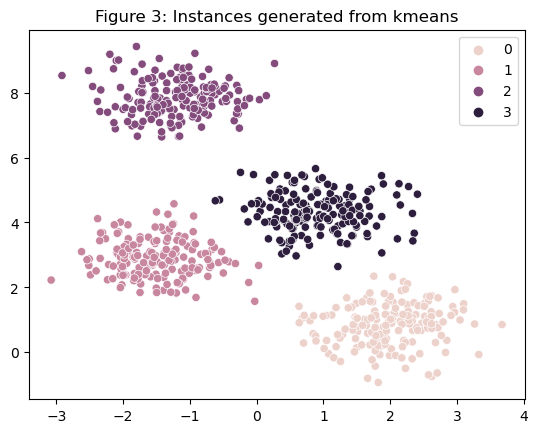

In [7]:
sns.scatterplot(data=X, x=X[:,0], y=X[:,1], hue=kmeans.labels_)
plt.title('Figure 3: Instances generated from kmeans')
plt.show()

> The clustering data between Figure 1 and Figure 3 are identical

**3. Report two comparisons: one for your implementation’s hypotheses against the expected values in cluster_assignments; another for your implementation’s hypotheses against the hypotheses generated by scikit-learn. You may also show this on a chart, as is shown in Figure 1.**

According to the scikit-learn documentations, sklearn.metrics.rand_score and sklearn.metrics.adjusted_rand_score measure the similarity between two clustering by considering all pairs of sample and counting paris. With respect to the rand_score and adjusted_rand_score, my implementation's hypotheses shows 0.99, indicating excellent predictive performance.

In [8]:
from sklearn.metrics import rand_score, adjusted_rand_score

In [9]:
r1 = rand_score(cluster_assignments, hypotheses)
r2 = adjusted_rand_score(cluster_assignments, hypotheses)
print(r1, r2)

0.9985734723073779 0.9961850080391301


## 2.Choose and run clustering algorithms

### 2-1. Chicago taxi data

**1. The reason why you chose the clustering algorithm(s)**

The KMeans algorithm is well-suited for clustering the Chicago taxi dataset based on geographic pickup and dropoff information. Several reasons support this:

1. KMeans algorithm is capable of clustering with large datasets efficiently.
2. It is easy to interpret and visualize the result.
3. Suppose I operate a taxi corporation and aim to maximize profits by allocating taxi drivers across specific districts, also considering areas where people are not crowded. In this scenario, the KMeans algorithm provides clusters of areas.

**2. Any pre-processing of the data or any hyperparameter settings**

- Check the features/attributes of datasets, find features that are applied to DBSCAN algorithms.
- Confirm the missing value and decide whether it is removed or not.
- Univariate Analysis by drawing histplot or by checking `value_counts` of each feature.
- Bivariate Analysis by checking `corr()` or by drawing heatmap.
- For hypterparameter tunning, draw the line graph showing the inertia associated with each value of n, and identify the elbow which represents the optimal hyperparameter for the algorithm.

In [10]:
df = pd.read_csv('Taxi Trips 2013-2023.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101788 entries, 0 to 101787
Data columns (total 23 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip ID                     101788 non-null  object 
 1   Taxi ID                     101779 non-null  object 
 2   Trip Start Timestamp        101788 non-null  object 
 3   Trip End Timestamp          101788 non-null  object 
 4   Trip Seconds                101763 non-null  float64
 5   Trip Miles                  101788 non-null  float64
 6   Pickup Census Tract         35179 non-null   float64
 7   Dropoff Census Tract        35054 non-null   float64
 8   Pickup Community Area       95650 non-null   float64
 9   Dropoff Community Area      92192 non-null   float64
 10  Fare                        101681 non-null  float64
 11  Tips                        101681 non-null  float64
 12  Tolls                       101681 non-null  float64
 13  Extras        

In [12]:
df.isna().sum()

Trip ID                           0
Taxi ID                           9
Trip Start Timestamp              0
Trip End Timestamp                0
Trip Seconds                     25
Trip Miles                        0
Pickup Census Tract           66609
Dropoff Census Tract          66734
Pickup Community Area          6138
Dropoff Community Area         9596
Fare                            107
Tips                            107
Tolls                           107
Extras                          107
Trip Total                      107
Payment Type                      0
Company                           0
Pickup Centroid Latitude       6131
Pickup Centroid Longitude      6131
Pickup Centroid Location       6131
Dropoff Centroid Latitude      9299
Dropoff Centroid Longitude     9299
Dropoff Centroid  Location     9299
dtype: int64

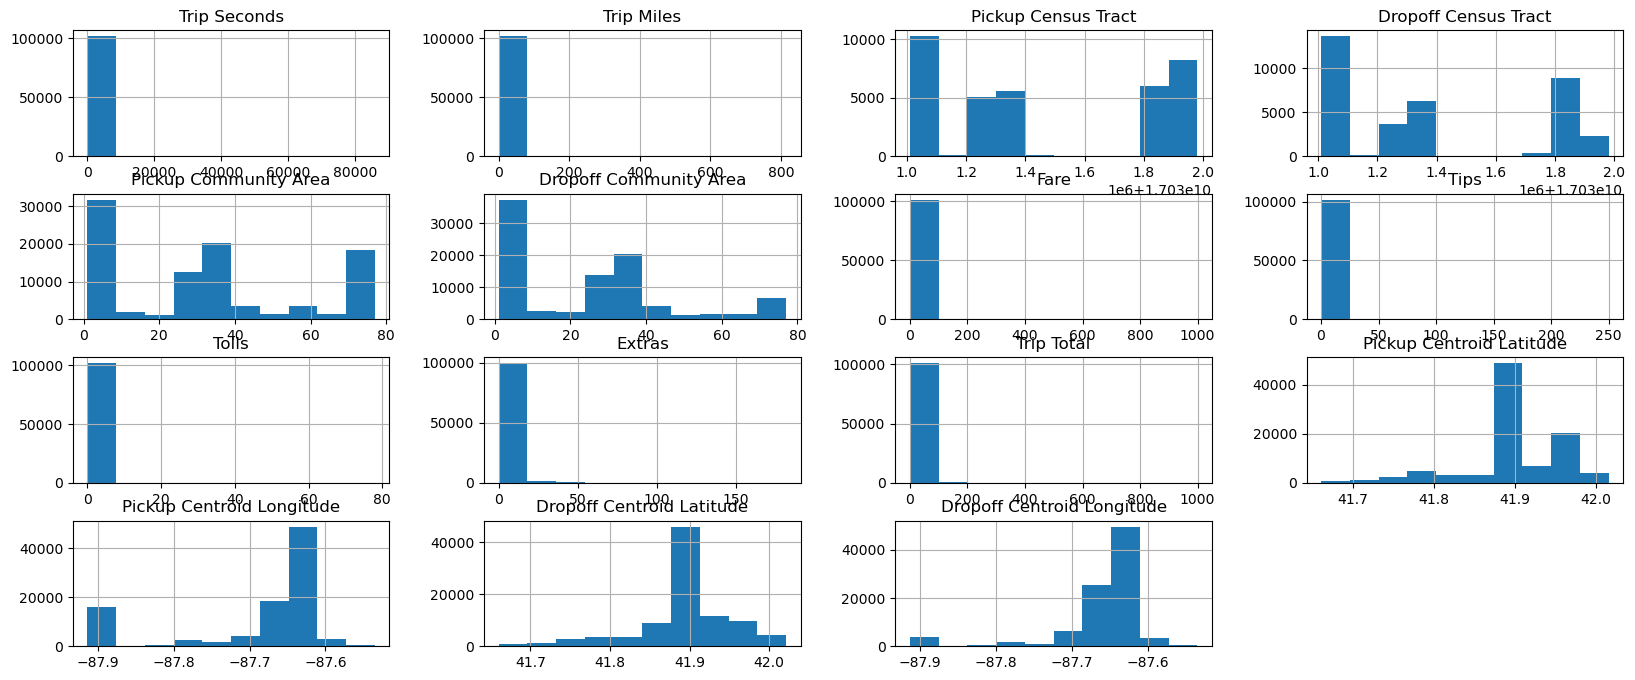

In [13]:

df.hist(figsize=(20, 8))
plt.show()

<Axes: >

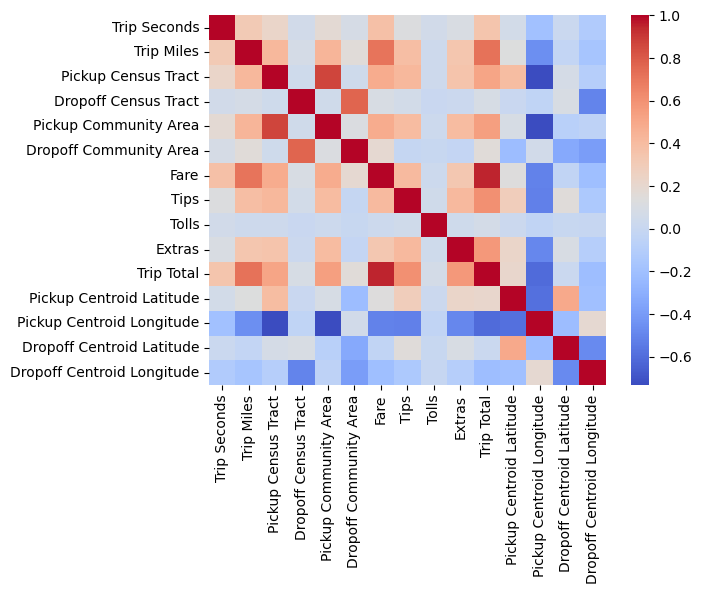

In [14]:
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')

In [15]:
df['Company'].value_counts()

Flash Cab                               21931
Taxi Affiliation Services               20517
Sun Taxi                                10576
City Service                            10289
Taxicab Insurance Agency Llc             8022
Chicago Independents                     5555
5 Star Taxi                              4640
Globe Taxi                               3898
Medallion Leasin                         3353
Taxicab Insurance Agency, LLC            2800
Blue Ribbon Taxi Association             2438
Star North Taxi Management Llc           2201
Choice Taxi Association                  1892
Top Cab Affiliation                      1654
U Taxicab                                 671
Patriot Taxi Dba Peace Taxi Associat      335
Koam Taxi Association                     289
312 Medallion Management Corp             168
Chicago Taxicab                           117
Setare Inc                                108
Top Cab                                    65
Metro Jet Taxi A.                 

In [16]:
# Pickup Centroid Latitude, Pickup Centroid Longitude will be used and remove entires if it either point is not available.
df_coords = df.dropna(subset=['Pickup Centroid Latitude', 'Pickup Centroid Longitude'])[['Pickup Centroid Latitude', 'Pickup Centroid Longitude']]
df_coords.isna().sum()

Pickup Centroid Latitude     0
Pickup Centroid Longitude    0
dtype: int64

In [17]:
from sklearn.cluster import KMeans

In [18]:
inertias = pd.DataFrame(data=[], index=range(2, 20), columns = ['inertia'])

for k in range(2, 20): 
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_coords)
    inertias.loc[k] = kmeans.inertia_
inertias

/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

,inertia
2,380.10311
3,210.984945
4,130.747215
5,77.34959
6,64.512104
7,52.627227
8,43.16002
9,36.695917
10,31.96106
11,27.917231


<Axes: >

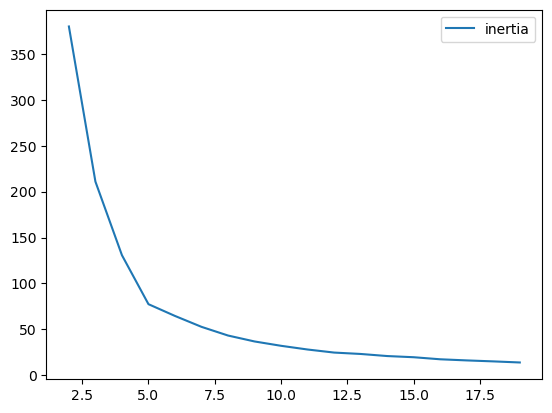

In [19]:
sns.lineplot(data=inertias)

**3. Output from the algorithm(s) -- show what clusters were generated**

In [20]:
kmeans = KMeans(n_clusters=5) # Based on the hyperparameter tunning.
kmeans.fit(df_coords)

/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

<Axes: xlabel='Pickup Centroid Longitude', ylabel='Pickup Centroid Latitude'>

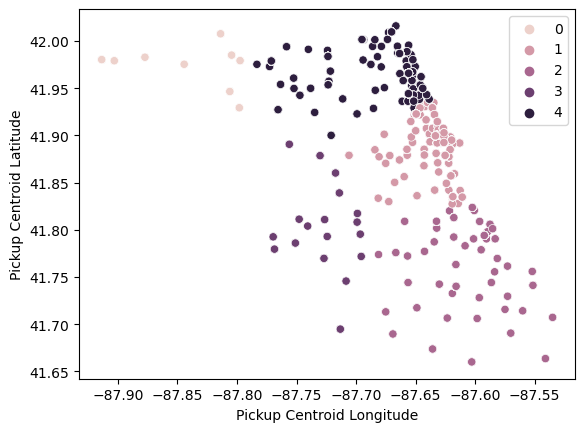

In [21]:
sns.scatterplot(data=df_coords, x='Pickup Centroid Longitude', y='Pickup Centroid Latitude', hue=kmeans.labels_)

**4. The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?**

In [22]:
from sklearn.metrics import silhouette_score

In [23]:
score1 = silhouette_score(df_coords, kmeans.fit_predict(df_coords))

/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
print('The Silhouette coefficient for KMeans is ', score1)

The Silhouette coefficient for KMeans is  0.7045257949946647


The `silhouette_score` range from -1 to 1, and value near 0 indecates overlapping clusters. The silhouette coeeficient for this datasets is 0.7 which is great that I expected.

### 2-2. Mopsi data subset

**1. The reason why you chose the clustering algorithm(s)**

- I applied the KMeans, DBSCAN, Hierarchical algorithms to the Mopsi data subsets. 
- As shown below, Kmeans and Hierarchical algorithms produced distinct cllustering with the proper hyperparameter settings. However, it's difficult to find the distinct clustering using the DBSCAN algorithm. 
- Therefore, I'm going to use KMeans or Hierarhical algorithmm for these datasets.

**2. Any pre-processing of the data or any hyperparameter settings**

- check the size of datasets and for the existence of missing values. 
- For hypterparameter tunning for KMeans, draw a line graph showing the inertia associated with each value of n, and identify the elbow which represents the optimal hyperparameter for the algorithm.
- For hyperparameter setting for DBSCAN, retrieve 10 number between 1 to 5000 and check the `silhouette_score` which indicates the performance of predicitve algorithm. 

**3. Output from the algorithm(s) -- show what clusters were generated**

In [25]:
df2 = pd.read_csv('MopsiLocationsUntil2012-Finland.txt', sep='\t', header=None)
df2.columns = ['first', 'second']
df2.head()

,first,second
0,625983,297439
1,626146,297440
2,626144,297456
3,626004,297394
4,626018,297437


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13467 entries, 0 to 13466
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   first   13467 non-null  int64
 1   second  13467 non-null  int64
dtypes: int64(2)
memory usage: 210.5 KB


In [27]:
df2.isna().sum()

first     0
second    0
dtype: int64

<Axes: xlabel='first', ylabel='second'>

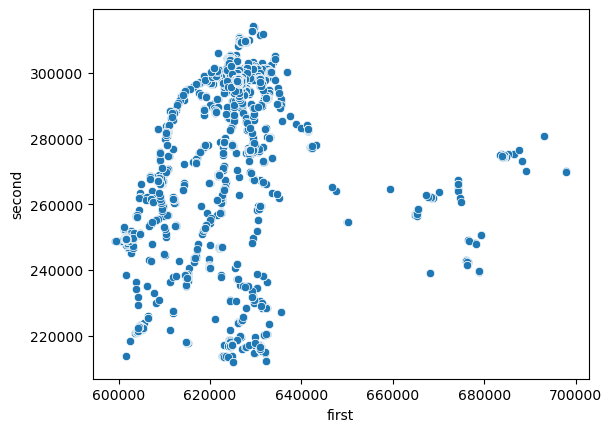

In [28]:
sns.scatterplot(data=df2, x='first', y='second')

In [29]:
inertias = pd.DataFrame(data=[], index=range(2, 20), columns = ['inertia'])
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df2)
    inertias.loc[k] = kmeans.inertia_
inertias

/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Use

,inertia
2,1595747031909.060059
3,1047066382116.765015
4,698109848447.5354
5,511129110184.320557
6,390075895024.40332
7,317529387751.902405
8,264504133402.037994
9,223334335196.595459
10,196158291069.915314
11,165656647028.428711


<Axes: >

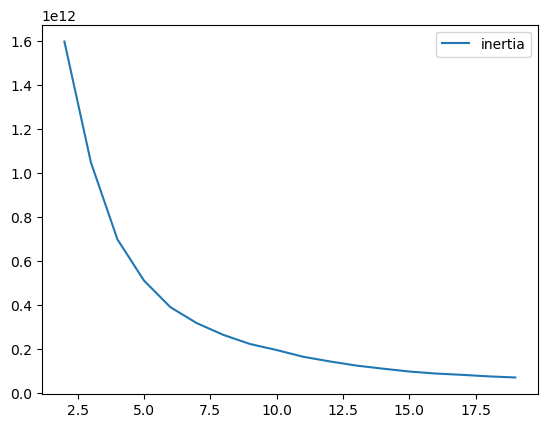

In [30]:
sns.lineplot(data=inertias)

In [31]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(df2)

/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5)

<Axes: xlabel='first', ylabel='second'>

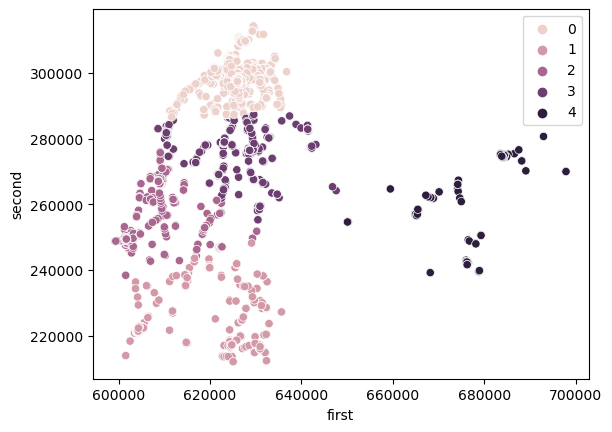

In [32]:
sns.scatterplot(data=df2, x='first', y='second', hue=kmeans.labels_)

In [33]:
from sklearn.cluster import DBSCAN

d = np.linspace(1, 5000, num=10)
best_eps = None
best_silhouette_score = -1

for eps in d:
    dbscan = DBSCAN(eps=eps)
    labels = dbscan.fit_predict(df2)
    
    silhouette = silhouette_score(df2, labels)
    
    if silhouette > best_silhouette_score:
        best_silhouette_score = silhouette
        best_eps = eps

print("Best eps:", best_eps)
print("Best silhouette score:", best_silhouette_score)

Best eps: 1111.888888888889
Best silhouette score: 0.6847627369747245


In [34]:
max_dist = 1000
hoodsize = 4
dbscan = DBSCAN(eps=max_dist, min_samples=hoodsize)
dbscan.fit(df2)

DBSCAN(eps=1000, min_samples=4)

In [35]:
np.unique(dbscan.labels_)

array([ -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
        12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
        25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
        38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,
        51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,
        90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

<Axes: xlabel='first', ylabel='second'>

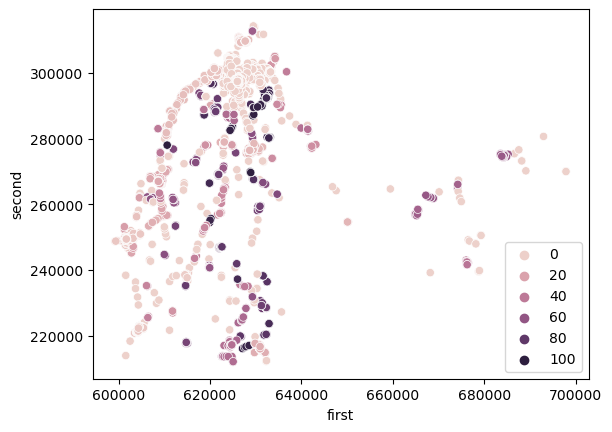

In [36]:
sns.scatterplot(data=df2, x='first', y='second', hue=dbscan.labels_)

In [37]:
from sklearn.cluster import AgglomerativeClustering 

In [38]:
k = 4
metric = 'euclidean'
linkage = 'ward'
hierarichal = AgglomerativeClustering(n_clusters=k, metric=metric, linkage=linkage)
hierarichal.fit(df2)

AgglomerativeClustering(metric='euclidean', n_clusters=4)

<Axes: xlabel='first', ylabel='second'>

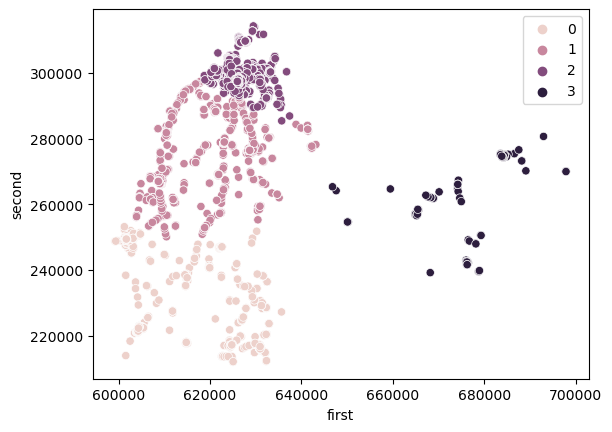

In [39]:
sns.scatterplot(data=df2, x='first', y='second', hue=hierarichal.labels_)

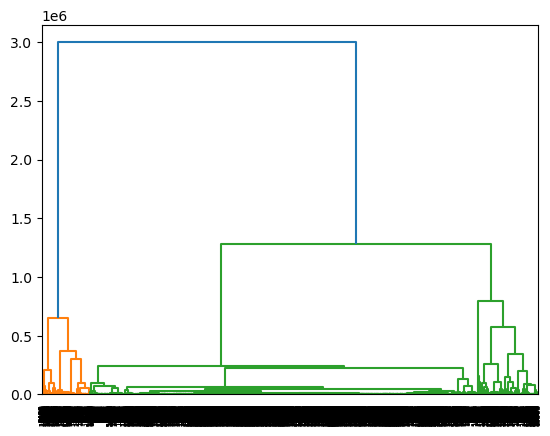

In [40]:
from scipy.cluster.hierarchy import linkage, dendrogram 

Z = linkage(df2, 'ward')

plt.figure()
dendrogram(Z)
plt.show()

**4. The metrics you used to evaluate the output. What kind of performance did you get from
that algorithm? Is that what you expected?**


In this case, s1 (from KMeans) and s3 (from Hierarchical clustering) have higher silhouette scores, suggesting that these algorithms produced better-defined clusters.

In [41]:
s1 = silhouette_score(df2, kmeans.fit_predict(df2))
s2 = silhouette_score(df2, dbscan.fit_predict(df2))
s3 = silhouette_score(df2, hierarichal.fit_predict(df2))
print(s1, s2, s3)

/Users/haebinlee/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.7966975914352101 0.6292560206406086 0.7858093727134721


### Extend K-Means (optional)
Sometimes it is useful to have the clusters of (roughly) the same size. For example, when sorting laundry to be placed in a washing machine, it is recommended that “dark” clothes be washed separately from “light” clothes. In this example, if a person has too many “light” clothes, the machine may be overloaded and will not do a good job at washing. However, in many wardrobes, some articles of clothing may fall in between “light” and “dark” and therefore may be used to balance the groups and get all the washing done efficiently.
Change your implementation of K-Means in the first part to include an additional optional Boolean (True/False) argument, balanced. The default value must be False. When balanced is set to True, the implementation changes so that each of the k clusters are (roughly) equal with respect to the number of instances in the cluster hypotheses — i.e. the implementation generates clusters of (roughly) the same size. When balanced is set to False, the logic is the canonical K-Means, described in the Background section.

In [42]:
from cluster import cluster
%run -i cluster.py

In [43]:
unbalanced = cluster(5) # Based on the hyperparameter tunning.
h1, c1 = unbalanced.fit(df_coords.values)

In [44]:
print(np.bincount(h1))

[54868 12455  3896  8018 16420]


In [45]:
from cluster import cluster
%run -i cluster.py

In [46]:
balanced = cluster(5) # Based on the hyperparameter tunning.
h2, c2 = balanced.fit(df_coords.values, True)

In [47]:
print(np.bincount(h2))

[19897 18940 18940 18940 18940]


When setting the it reveals every clusters has roughly the same size